<a href="https://colab.research.google.com/github/jaiyeoba-1/Projects/blob/main/TextBlob_for_Sentiment_Analysis_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

In [ ]:
!pip install textblob

After Textblob library is installed we would need to import it in order to use it utilities.

In [ ]:
from textblob import TextBlob

## Sentiment Analysis

In [ ]:
# Take user input and convert it to Text Blob object
user_input = input("Enter a phrase to evaluate: ")

blob = TextBlob(user_input)

Enter a phrase to evaluate: This is great but you could do better. 


In [ ]:
# Extract sentiment
print(blob.sentiment)

Sentiment(polarity=0.65, subjectivity=0.625)


In [ ]:
# Further dividing the score
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Interpret sentiment scores
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print("Sentiment Analysis:")
print(f"Polarity: {polarity} ({sentiment_label})")
print(f"Subjectivity: {subjectivity}")


Sentiment Analysis:
Polarity: 0.55 (Positive)
Subjectivity: 0.7


##### Polarity:

The polarity score indicates the sentiment of the text, ranging from -1 (very negative) to 1 (very positive). Here's a breakdown of polarity values:

Polarity close to 1: Indicates a positive sentiment. The closer it is to 1, the stronger the positive sentiment.
Polarity close to -1: Indicates a negative sentiment. The closer it is to -1, the stronger the negative sentiment.
Polarity around 0: Indicates a neutral sentiment. Polarity values close to 0 suggest that the text is neither positive nor negative.

##### Subjectivity:
The subjectivity score measures the subjectivity of the text, ranging from 0 to 1.

Subjectivity close to 0: Indicates that the text is more objective and factual.
Subjectivity close to 1: Indicates that the text is more subjective and opinionated.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. Loading and displaying the dataset's structure.

In [ ]:
review_dataset = pd.read_csv("/content/smartwatch-reviews.csv")
review_dataset.head()

Product Name         Name  Stars  \
0  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...  Karthikeyan    5.0   
1  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...     Vishvesh    4.0   
2  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...        Bindu    5.0   
3  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...   Sandhyaram    2.0   
4  Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smar...       Suresh    1.0   

                                               Title  Date  \
0       5.0 out of 5 stars\nGood and reliable watch.   NaN   
1  4.0 out of 5 stars\nThe Perfect Budget Apple W...   NaN   
2                       5.0 out of 5 stars\nGood One   NaN   
3                2.0 out of 5 stars\nBattery problem   NaN   
4               1.0 out of 5 stars\nNot as per image   NaN   

                                         Description  
0  Very good in terms of features and amazing qua...  
1  This is the first time I am using an Apple Wat...  
2        Simple look with basic features.\nRead more  
3                        2h charging 100%\nRead more  
4                    Screen is very small\nRead more

In [ ]:
# Mapping product names to shorter names
product_name_mapping = {
    'Apple Watch SE (2nd Gen, 2023) [GPS 40mm] Smartwatch with Starlight Aluminum Case with Starlight Sport Loop One Size. Fitness & Sleep Tracker, Crash Detection, Heart Rate Monitor, Retina Display': 'Apple Watch SE (2023)',
    'Apple Watch SE (GPS + Cellular, 40mm) - Space Grey Aluminium Case with Midnight Sport Band - Regular': 'Apple Watch SE (Cellular)',
    'Apple Watch Series 8 [GPS 45 mm] Smart Watch w/Midnight Aluminium Case with Midnight Sport Band. Fitness Tracker, Blood Oxygen & ECG Apps, Always-On Retina Display, Water Resistant': 'Apple Watch Series 8',
    'Fitbit Inspire 2 Health & Fitness Tracker with a Free 1-Year Premium Trial, 24/7 Heart Rate, Black/Black, One Size (S & L Bands Included)': 'Fitbit Inspire 2',
    'Fitbit Versa 4 Fitness Watch (Black/Graphite Aluminium) with 6-Month Premium Membership': 'Fitbit Versa 4',
    'Fitbit Inspire 3 Health & Fitness Tracker (Midnight Zen/Black) with 6-Month Premium Membership': 'Fitbit Inspire 3',
    'Garmin Vivoactive 3 GPS Smartwatch, 1.2 inch': 'Garmin Vivoactive 3',
    'Garmin Forerunner 55, GPS Running Watch with Daily Suggested Workouts, Up to 2 Weeks of Battery Life (Whitestone)': 'Garmin Forerunner 55',
    'Garmin Forerunner 45, 42MM Easy-to-Use GPS Running Watch with Garmin Coach Free Training Plan Support, Red (No-Cost EMI Available)': 'Garmin Forerunner 45',
    "Fossil Gen 6 Digital Black Dial Men's Watch-FTW4059": "Fossil Gen 6 Digital",
    'Fossil Gen 6 Display Wellness Edition Black Smartwatch FTW4069': 'Fossil Gen 6 Display'
}

review_dataset['Product Name'] = review_dataset['Product Name'].map(product_name_mapping)


In [ ]:
review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  2750 non-null   object 
 1   Name          2750 non-null   object 
 2   Stars         1760 non-null   float64
 3   Title         2750 non-null   object 
 4   Date          0 non-null      float64
 5   Description   2750 non-null   object 
dtypes: float64(2), object(4)
memory usage: 129.0+ KB


In [ ]:
review_dataset.shape

(2750, 6)

#### 2. Computing summary statistics like mean, median, min, max, etc.

In [ ]:
review_dataset.describe()

Stars  Date
count  1760.000000   0.0
mean      4.414773   NaN
std       1.147263   NaN
min       1.000000   NaN
25%       4.000000   NaN
50%       5.000000   NaN
75%       5.000000   NaN
max       5.000000   NaN

#### 3. Checking for missing values.

In [ ]:
review_dataset.isna().sum()

Product Name       0
Name               0
Stars            990
Title              0
Date            2750
Description        0
dtype: int64

Now we have a basic idea about the dataset. Let us do a little bit of data cleaning. Lets start with removing unnecessary columns.

If we look at the Date Column, there is no valid entry in that column. So we can remove that column from the dataset.

In [ ]:
review_dataset = review_dataset.drop(["Date"],axis=1)
review_dataset.head()

Product Name         Name  Stars  \
0  Apple Watch SE (2023)  Karthikeyan    5.0   
1  Apple Watch SE (2023)     Vishvesh    4.0   
2  Apple Watch SE (2023)        Bindu    5.0   
3  Apple Watch SE (2023)   Sandhyaram    2.0   
4  Apple Watch SE (2023)       Suresh    1.0   

                                               Title  \
0       5.0 out of 5 stars\nGood and reliable watch.   
1  4.0 out of 5 stars\nThe Perfect Budget Apple W...   
2                       5.0 out of 5 stars\nGood One   
3                2.0 out of 5 stars\nBattery problem   
4               1.0 out of 5 stars\nNot as per image   

                                         Description  
0  Very good in terms of features and amazing qua...  
1  This is the first time I am using an Apple Wat...  
2        Simple look with basic features.\nRead more  
3                        2h charging 100%\nRead more  
4                    Screen is very small\nRead more

The next column that needs attention is "Stars". First we will calculate the % of NULL values

In [ ]:
review_dataset["Stars"].isnull().sum()/len(review_dataset)*100

36.0

Since 36% of data is NULL, we can either drop null values or imputate. But since this is an important column in our analysis, it would be a better choice to drop null values. If the percentage is very less, say 5-10% we can imputate the null values with suitable value(mean or median or mode).

In [ ]:
cleaned_review_dataset = review_dataset.dropna()

In [ ]:
cleaned_review_dataset.isna().sum()

Product Name    0
Name            0
Stars           0
Title           0
Description     0
dtype: int64

The dataset is clean now and ready for visualization. Let us look at the various options to visualize data.

#### 4. Visualizing the distribution of ratings using a count plot.

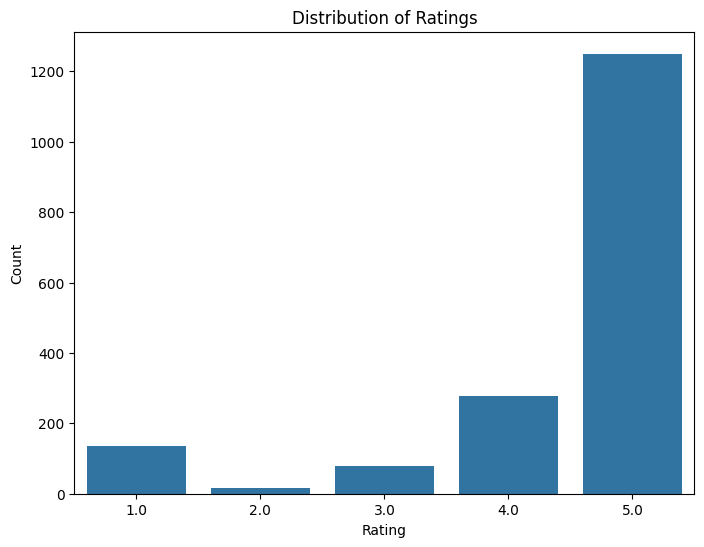

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stars', data=cleaned_review_dataset)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

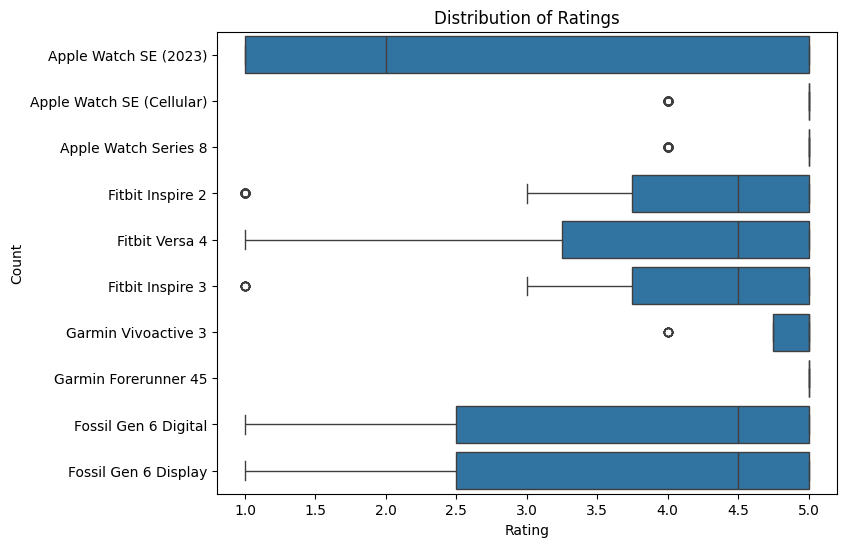

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stars', y='Product Name', data=cleaned_review_dataset)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Sentiment Visualizations

In [ ]:
# Perform sentiment analysis using TextBlob
def get_sentiment_scores(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity, analysis.sentiment.subjectivity

cleaned_review_dataset['Polarity'], cleaned_review_dataset['Subjectivity'] = zip(*cleaned_review_dataset['Description'].apply(get_sentiment_scores))

In [ ]:
# Categorize sentiment based on polarity scores
def categorize_sentiment(polarity):
  if polarity > 0:
    return 'Positive'
  elif polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

cleaned_review_dataset['Sentiment'] = cleaned_review_dataset['Polarity'].apply(categorize_sentiment)

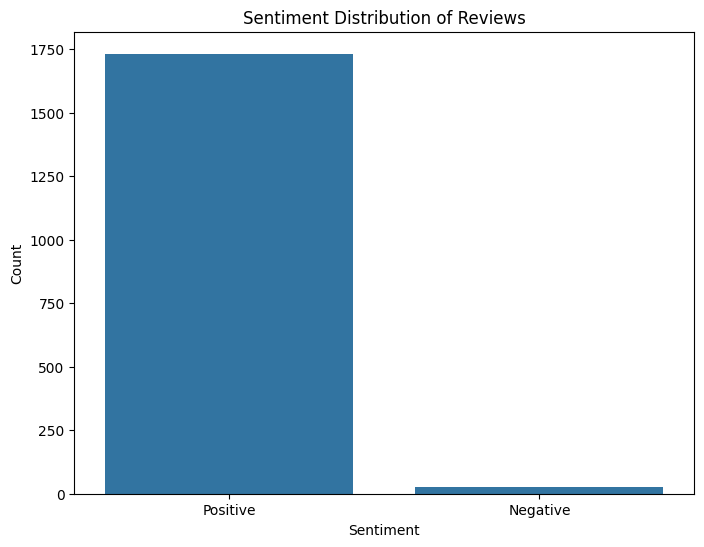

In [ ]:
# Create sentiment distribution plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=cleaned_review_dataset)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


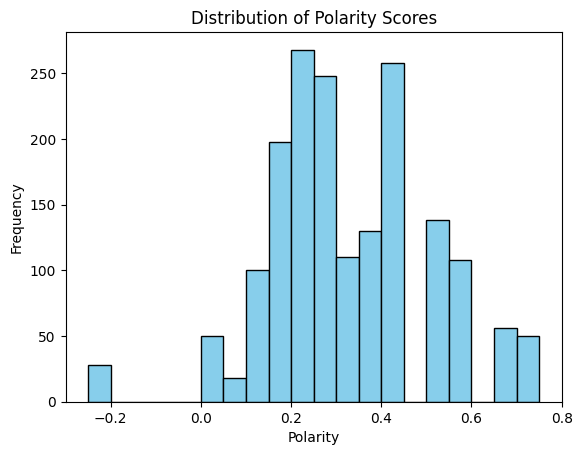

In [ ]:
# Plot histogram of polarity
plt.hist(cleaned_review_dataset['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

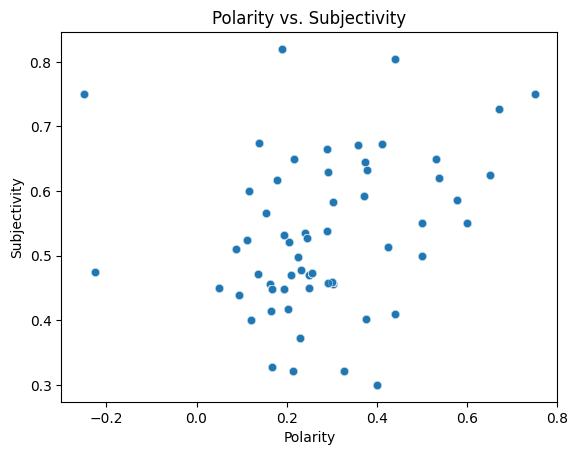

In [ ]:
# Scatter plot
sns.scatterplot(x='Polarity', y='Subjectivity', data=cleaned_review_dataset, alpha=0.5)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

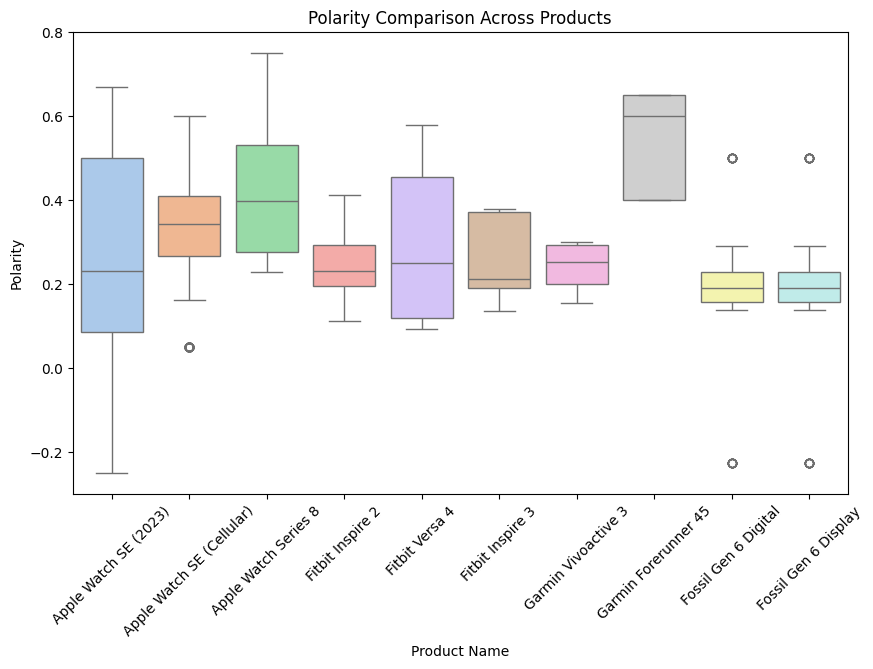

In [ ]:
# Create a box plot to compare polarity for different products
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Name', y='Polarity', data=cleaned_review_dataset, palette='pastel')
plt.title('Polarity Comparison Across Products')
plt.xlabel('Product Name')
plt.ylabel('Polarity')
plt.xticks(rotation=45)
plt.show()

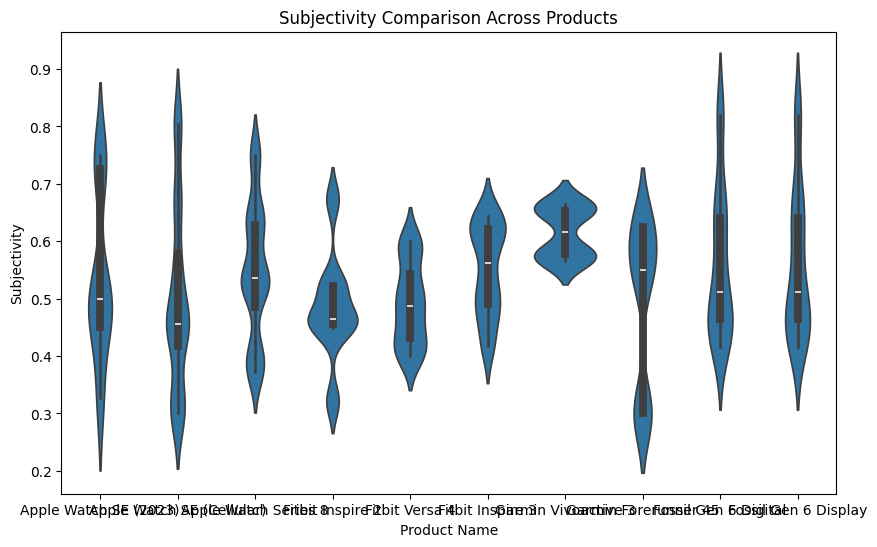

In [ ]:
# Create a violin plot to compare subjectivity for different products
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product Name', y='Subjectivity', data=cleaned_review_dataset)
plt.title('Subjectivity Comparison Across Products')
plt.xlabel('Product Name')
plt.ylabel('Subjectivity')
plt.show()


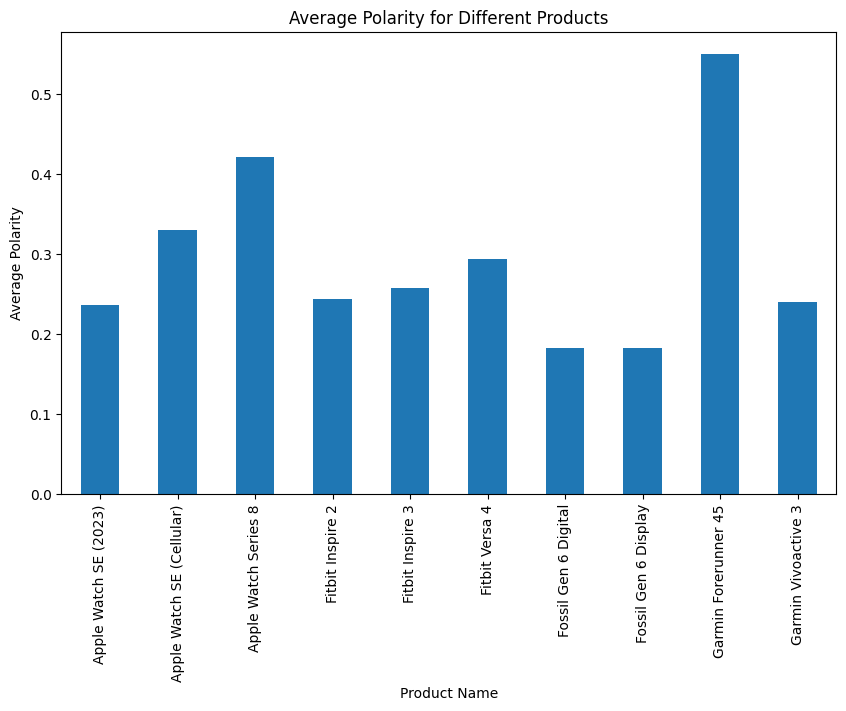

In [ ]:
# Create a bar chart to compare the average polarity for each product
average_polarity = cleaned_review_dataset.groupby('Product Name')['Polarity'].mean()
plt.figure(figsize=(10, 6))
average_polarity.plot(kind='bar')
plt.title('Average Polarity for Different Products')
plt.xlabel('Product Name')
plt.ylabel('Average Polarity')
plt.show()


#### 5. Creating a word cloud to visualize common words in the review text.

Now lets see an important feature Wordcloud.

A word cloud is a visualization technique that represents text data where <font color='BLUE'><b>the size of each word indicates its frequency or importance within the text</b></font>. In a word cloud, <font color='YELLOW'>more frequent words are displayed with larger font sizes, making them visually prominent</font>. Word clouds are commonly used to gain insights into the most significant terms or themes in a body of text.




The significance of word clouds in sentiment analysis lies in their ability to:

1. Visualize Key Terms.
2. Highlight Sentiment-related Terms.
3. Discover Trends.
4. Communicate Findings.
5. Preprocessing and Feature Selection.

While word clouds can be valuable in exploring and visualizing textual data, they should be used in conjunction with other analytical techniques, such as sentiment analysis algorithms, to provide a comprehensive understanding of sentiment trends and patterns within the data. Additionally, word clouds are more qualitative than quantitative, so they are often used as an exploratory tool rather than a definitive analysis method.

There are several varieties or types of word clouds, each with its own characteristics and applications. Here are some common varieties of word clouds:


<u><b>1. Standard Word Clouds:</b></u>

Standard word clouds, also known as basic word clouds, display words from a text dataset based on their frequency. The size of each word in the cloud corresponds to its frequency in the text. These word clouds are simple and effective for visualizing the most common terms in a dataset.

In [ ]:
# Word cloud of review text
from wordcloud import WordCloud

In [ ]:
# Combine all review text into a single string
all_reviews = ' '.join(cleaned_review_dataset['Description'].dropna())

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

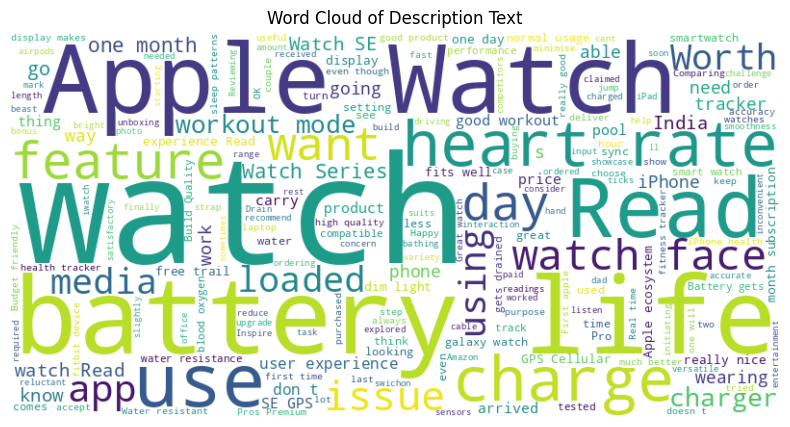

In [ ]:
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Text')
plt.show()

In [ ]:
all_titles = ' '.join(cleaned_review_dataset['Title'].dropna())

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

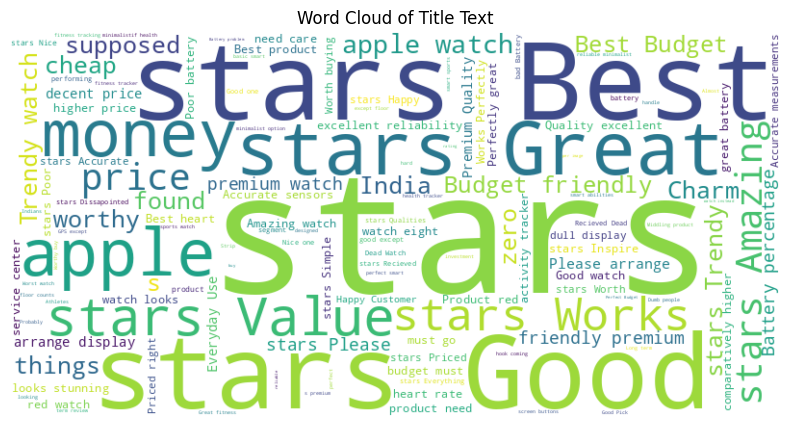

In [ ]:
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Text')
plt.show()

In [ ]:
all_prod_names = ' '.join(cleaned_review_dataset['Product Name'].dropna())

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_prod_names)

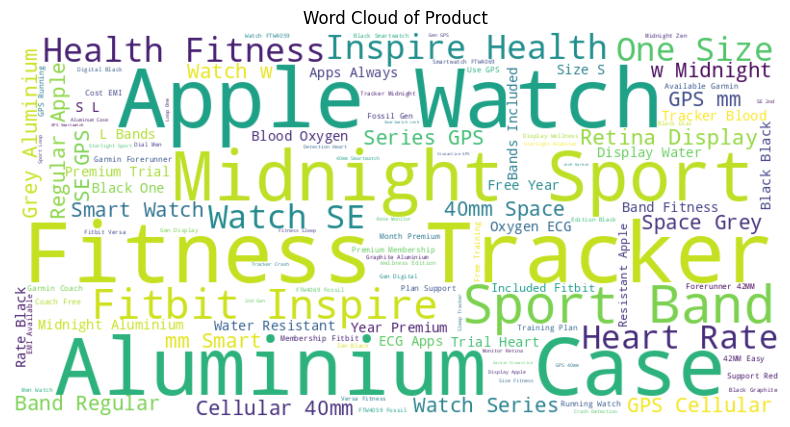

In [ ]:
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product')
plt.show()

<u><b>2. Weighted Word Clouds:</b></u>

Weighted word clouds assign weights or importance scores to words based on criteria other than frequency alone. For example, sentiment analysis scores, TF-IDF (Term Frequency-Inverse Document Frequency) values, or custom weights can be used to determine the size or prominence of words in the cloud. Weighted word clouds provide a more nuanced view of the text data by highlighting important terms based on specific criteria.

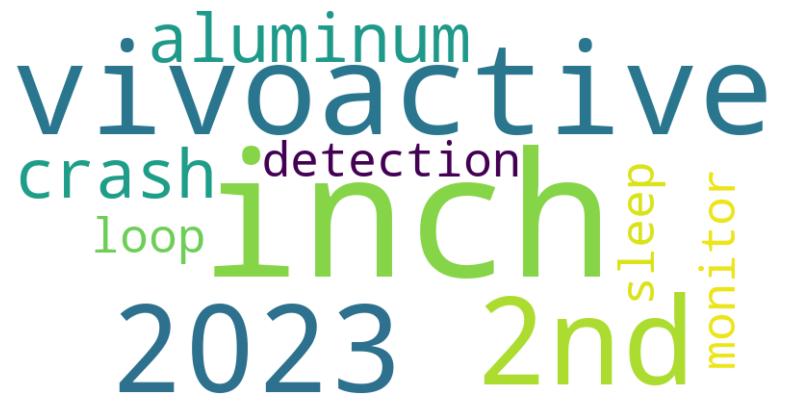

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = list(cleaned_review_dataset['Product Name'])

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=10, prefer_horizontal=0.7)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us see another meaningful example with a sample text of our choice.

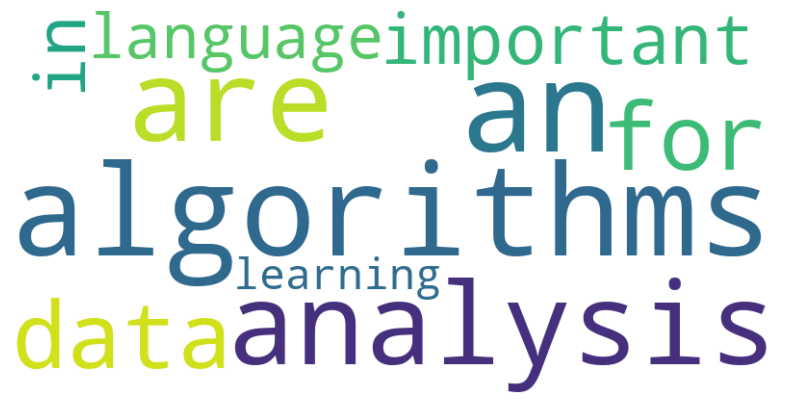

In [ ]:
corpus = ["Python is a versatile programming language.",
          "Data analysis is an important skill in Python.",
          "Machine learning algorithms are used for predictive modeling."]

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=10, prefer_horizontal=0.7)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<u><b>3. Hierarchical Word Clouds:</b></u>

Hierarchical word clouds organize words into hierarchical or nested structures based on their relationships or categories. For example, words can be grouped into categories such as topics, sentiments, or themes, and displayed in a hierarchical manner within the word cloud. This type of word cloud is useful for visualizing complex relationships and structures within text data.

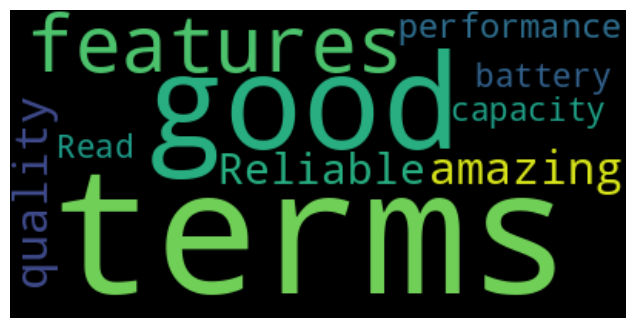

In [ ]:
text = cleaned_review_dataset.Description.iloc[0]

wordcloud = WordCloud(collocations=False).generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

given below a better custom example for hierarchical word cloud

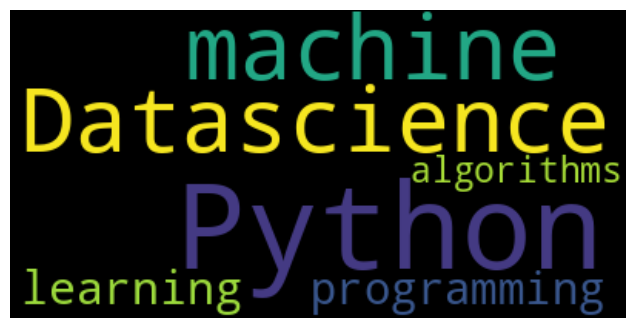

In [ ]:
text = "Python Datascience machine learning python programming algorithms"

wordcloud = WordCloud(collocations=False).generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<b><u>4. Interactive Word Clouds:</u></b>

Interactive word clouds allow users to interact with the visualization by hovering over words to display additional information, clicking on words to drill down into related content, or adjusting parameters to customize the display (e.g., font size, color scheme). Interactive word clouds enhance user engagement and exploration of textual data.

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

text = cleaned_review_dataset['Product Name'].iloc[0]


# Generate word cloud using the WordCloud library
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Convert word cloud to plotly format
wordcloud_plotly = go.Figure(go.Image(z=wordcloud.to_array()))

# Configure layout and display the plot
wordcloud_plotly.update_layout(title='WordCloud', xaxis=dict(visible=False), yaxis=dict(visible=False))
iplot(wordcloud_plotly)

In this i have added only one product name in place of the text to be displayed. We can still add some more features to this.

By adding event handlers like creating a function for on_click event or hover event, we can make this one even interactive one.

<b><u>5. 3D Word Clouds:</u></b>

3D word clouds add a three-dimensional aspect to the visualization, creating a more visually immersive experience. Words are displayed in a three-dimensional space, with options for rotation, zooming, and perspective changes. While 3D word clouds can be visually appealing, they are sometimes criticized for potentially sacrificing readability and clarity compared to 2D word clouds.

Each variety of word cloud has its strengths and can be chosen based on the goals, data characteristics, and audience preferences for visualization and analysis.

#### 6. Analyzing frequency counts

Frequency count plays a crucial role in sentiment analysis by helping to identify the importance and prevalence of words or phrases within a text dataset. In sentiment analysis, frequency count refers to the number of times a particular word or phrase appears in the text, and it provides valuable insights into the sentiment expressed in the data.

Here's an overview of the role of frequency count in sentiment analysis:

1. Identifying Key Terms.
2. Understanding Sentiment Intensity.
3. Detecting Sentiment Trends.
4. Feature Selection.
5. Comparative Analysis.


Let us see a simple example on our review dataset.

In [ ]:
from collections import Counter

# Sample review dataset
reviews = list(cleaned_review_dataset['Description'].iloc[0:100])

# Tokenize and preprocess the reviews (remove punctuation and convert to lowercase)
processed_reviews = [' '.join(word.lower() for word in review.split() if word.isalnum()) for review in reviews]

# Count the frequency of each word in the processed reviews
word_count = Counter()
for review in processed_reviews:
    word_count.update(review.split())

# Display the word frequency count
print("Word Frequency Count:")
for word, count in word_count.items():
    print(f"{word}: {count}")

Word Frequency Count:
very: 26
good: 62
in: 70
terms: 8
of: 20
features: 12
and: 119
amazing: 4
reliable: 4
performance: 4
battery: 35
read: 100
more: 109
this: 67
is: 116
the: 232
first: 17
time: 4
i: 115
am: 4
using: 26
an: 8
apple: 33
after: 4
a: 133
lot: 4
reviews: 4
finally: 22
decided: 8
to: 96
go: 26
for: 100
watch: 137
se: 29
2023: 8
crisp: 4
amoled: 4
display: 17
on: 58
not: 57
if: 43
you: 98
guys: 4
need: 8
please: 8
skip: 8
basic: 21
as: 34
my: 31
thought: 4
get: 8
used: 8
ui: 8
gestures: 4
so: 22
personally: 4
that: 29
has: 22
latest: 4
os: 8
processor: 4
with: 26
minimal: 4
oxygen: 8
ecg: 4
available: 4
your: 48
smooth: 4
by: 4
far: 4
best: 13
have: 53
ever: 4
smart: 4
everything: 4
looks: 4
works: 13
feels: 4
calling: 4
call: 4
quality: 17
user: 8
at: 16
other: 8
end: 4
cannot: 4
tell: 4
difference: 4
whether: 4
through: 8
or: 4
accuracy: 4
heard: 4
many: 13
reviewers: 4
saying: 4
measuring: 8
stick: 4
all: 17
tracking: 4
heart: 4
it: 143
indeed: 4
measurements: 4
are: 35

In this we have taken the description of the first 100 records, and the word count shows the most used words in the description. Out of 100 records, there are 62 occurences of the word "good", which shows that the first 100 record have more positive reviews.